<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Despliegue de un servicio de machine learning con Flask y Django. Pruebas con Postman</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remihuro@hotmail.com

En esta práctica aprenderás a integrar en la Web un servicio de machine learning. En esta práctica mediante una red neuronal se puede predecir si un cliente en un banco es un cliente adecuado (BUENO, es decir, de bajo riesgo) o un cliente no adecuado (MALO, es decir, de alto riesgo) para concederle un crédito. En esta práctica no explicaremos el preprocesamiento, ni la red neuronal, solamente cargaremos dos archivos: un archivo pickle que incluye el transformador de variables y un archivo h5 que incluye la red neuronal entrenada. 

Para desarrollar o entender el preprocesamento y la red neuronal puedes consultar la práctica:
- <a href="https://genscinet.com/variables-categoricas-redes-neuronales-prestamos/" target="blank">Análisis y transformación de variables categóricas, clasificación y optimización (fine tuning) con redes neuronales – préstamos en instituciones bancarias</a>

Los dos archivos necesarios para continuar esta práctica los puedes descargar de: <a href="https://firebasestorage.googleapis.com/v0/b/edevspace.appspot.com/o/Recursos%2FpipePreprocesadores.pickle?alt=media&token=b30e1eb0-99d4-4a68-95aa-3ceda5873b45" target="blank">Preprocesador</a> y <a href="https://firebasestorage.googleapis.com/v0/b/edevspace.appspot.com/o/Recursos%2FmodeloRedNeuronalOptimizada.h5?alt=media&token=e1ea6b87-9552-4325-9104-61c607db2055" target="blank">Red Neuronal</a>

Requisitos: es importante tener conocimientos de Python.

Esta práctica está estructurada de la siguiente manera:

- [Frameworks Web para Python: Flask y Django](#Fundamentos)

- [Integración del método inteligente con Flask](#IntegracionFlask)

- [Integración del método inteligente con Django](#IntegracionDjango)

- [Creación de un proyecto de Django y características generales](#CreacionCaracteristicasProyectoDjango)

- [Desarrollo de la app y despliegue](#DesarrolloAppDespliegue)

- [Ejecución de la app](#EjecucionApp)

- [Pruebas de servicio](#Pruebas)

- [Conclusiones](#Conclusiones)

- [Referencias y enlaces](#Referencias-enlaces)

<div id="Fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Frameworks Web para Python: Flask y Django</h2> </div>

Características de un framework:
- genera agilidad en el proyecto
- optimiza el código
- mejora la colaboración entre los integrantes de un grupo de desarrollo
- ayuda a una mejor organización
- ahorra más tiempo de desarrollo
- habilita los beneficios de la estandarización

Frameworks Web para python: Pyramid, Bottle, Flask y Django. Entre ellos, los más populares son: Flask y Django.

**Flask:** es un microframework de solo un único archivo. Se esfuerza por ser simple y pequeño. Todo el framework consiste en un conjunto de módulos. No hay un esqueleto o una estructura de la cual partir.

**Django:** es el mayor framework web basado en Python. Se apoya en una comunidad grande y activa. Cuenta con una potente interfaz de administración. Es potente y tiene muchas características. Cuenta con una excelente documentación que está disponible de manera gratuita.

En esta práctica nos centraremos sobre todo en el framework Django, por ello, continuaremos con los fundamentos de este framework: 

**Framework Django - Generalidades**

- Django es un marco web Python de alto nivel que fomenta el desarrollo rápido y el diseño limpio y pragmático [1]. Creado por desarrolladores experimentados, se ocupa de gran parte de la molestia del desarrollo web, por lo que podemos concentrarnos en escribir una aplicación sin necesidad de reinventar la rueda. Es gratis y de código abierto.

- Django fue diseñado para ayudar a los desarrolladores a llevar las aplicaciones desde el concepto hasta su finalización lo más rápido posible.

- Django toma en serio la seguridad y ayuda a los desarrolladores a evitar muchos errores de seguridad comunes.

- Extremadamente escalable: permite escalar de manera rápida y flexible.

**Arquitectura de Django: Model-Template-View (MTV)** [2]

La **capa Model**: una capa de abstracción (los "modelos") para estructurar y manipular los datos de la aplicación web.

La **capa View**: permite encapsular la lógica responsable de procesar la solicitud de un usuario y de devolver la respuesta. Esta capa también se conoce como la capa de Control. En esta capa reside el programa o la lógica de aplicación en sí.

La **capa Template**: proporciona una sintaxis fácil de diseñar para representar la información que se presentará al usuario. Esta capa también se conoce como capa de Presentación.

En la documentación de django se puede profundizar sobre aspectos de: proceso de desarrollo, administración, seguridad, internacionalización y localización, rendimiento y optimización, framework geográfico, herramientas comunes de aplicaciones web, etc.

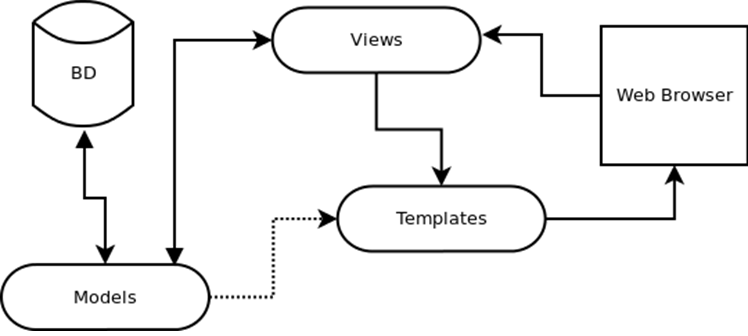

**WSGI**

WSGI son las siglas de Web Server Gateway Interface. Es una especificación que describe cómo se comunica un servidor web con una aplicación web, y cómo se pueden llegar a encadenar diferentes aplicaciones web para procesar una solicitud/petición (o request). WSGI es un estándar Python que está descrito en detalle en la especificación PEP 3333.

Actualmente **Gunicorn** es el servidor HTTP WSGI más usado por los Pythonistas. 
El nombre viene de la abreviatura Green Unicorn. Está escrito en Python y su uso es extremadamente simple.

Pese a que, tanto Django como Flask tienen servidores web integrados que se suelen usar para pruebas, sólo se recomienda el uso de estos precisamente para entornos de pruebas. Cuando queramos poner nuestra aplicación en producción, generalmente se usa **Nginx** como proxy inverso y **Gunicorn** como servidor WSGI. Gunicorn puede escalar con varios workers trabajando en paralelo y conectándose con nuestra aplicación Django/Flask.

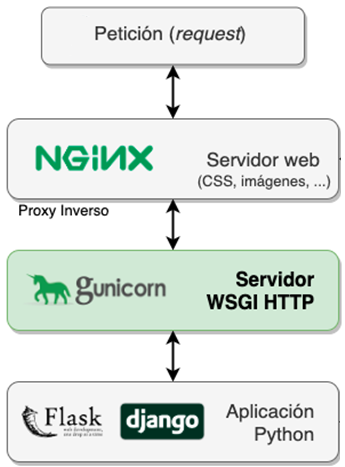

**ASGI**

ASGI (Asynchronous Server Gateway Interface) es un sucesor de WSGI, destinado a proporcionar un estándar interfaz entre servidores web, frameworks y aplicaciones Python con capacidad asíncrona.

WSGI proporciona un estándar para aplicaciones Python síncronas, ASGI proporciona uno para aplicaciones asíncronas y síncronas, con una implementación de compatibilidad con WSGI y múltiples servidores y marcos de aplicaciones.

En programación comúnmente se dice que los procesos de un programa que se ejecutan de forma independiente se llaman asíncronos, mientras que si son procesos ejecutados en respuesta a otro proceso serán síncronos. En comunicación también podemos hablar de sincronía.

<div id="IntegracionFlask" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Integración del método inteligente con Flask</h2> </div>

In [ ]:
#Importación de Flask
from flask import Flask, request
import requests

#Importación de módulos para el método inteligente
import pathlib
import pandas as pd
from sklearn.pipeline import Pipeline
from tensorflow.python.keras.models import load_model, model_from_json
from keras import backend as K
import pickle
import keras

app = Flask(__name__)

#Función para cargar preprocesador
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    print("Preprocesador cargado desde archivo")
    return pipeline

#Función para cargar red neuronal
def cargarNN(nombreArchivo):
    #model = load_model(nombreArchivo+'.h5')   
    model = keras.models.load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo") 
    return model

#Función para integrar el preprocesador y la red neuronal en un Pipeline
def cargarModelo():
        #Se carga el Pipeline con el Preprocesador (transformadores)
        nombreArchivoPreprocesador='ProyectoCreditoBanco\Recursos\pipePreprocesadores'
        pipe=cargarPipeline(nombreArchivoPreprocesador)
        cantidadPasos=len(pipe.steps)
        print("Cantidad de pasos: ",cantidadPasos)
        print(pipe.steps)
        #Se carga la Red Neuronal previamente entrenada
        modeloOptimizado=cargarNN('ProyectoCreditoBanco\Recursos\modeloRedNeuronalOptimizada')
        #Se agrega la Red Neuronal al final del Pipeline
        pipe.steps.append(['modelNN',modeloOptimizado])
        cantidadPasos=len(pipe.steps)
        print("Cantidad de pasos: ",cantidadPasos)
        print(pipe.steps)
        print('Red Neuronal integrada al Pipeline')
        return pipe

#La siguiente función permite predecir si se aprueba o no un crédito a un nuevo cliente. 
#En la función se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y
#los nombres de las variables. 
#El método "predict" ejecuta el Pipeline: los pasos de transformación y la clasificación (mediante la red neuronal).
def predecirNuevoCliente(ESTADOCUENTACORRIENTE='A12', PLAZOMESESCREDITO=6, HISTORIALCREDITO='A34', PROPOSITOCREDITO='A43',
                            MONTOCREDITO=1169, SALDOCUENTAAHORROS='A65', TIEMPOACTUALEMPLEO='A75', TASAPAGO=4, 
                            ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=67, 
                            VIVIENDA='A152', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A173', CANTIDADPERSONASAMANTENER=2,
                            TRABAJADOREXTRANJERO='A201'):  
    cnames=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
            'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
            'ACTIVOS','EDAD','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO','CANTIDADPERSONASAMANTENER',
            'TRABAJADOREXTRANJERO']
    Xnew=[ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,
          TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,
          CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
    pred = (pipe.predict(Xnew_Dataframe) > 0.5).astype("int32")
    pred = pred.flatten()[0]# de 2D a 1D
    if pred==1:
        pred='Crédito Aprobado. Felicidades =)'
    else:
        pred='Crédito Negado. Lo sentimos, intenta en otra ocasión'
    return pred

#Con Shift-Enter se ejecuta el servidor y se inicia cargando el Pipeline (estimador compuesto de preprocesador y red neuronal)
print("********** CARGANDO MODELO: PREPROCESADOR Y RED NEURONAL")
pipe=cargarModelo()

#El servidor queda a la espera de las solicitudes
@app.route("/")
def hello():
    return "Hola Mundo!"

@app.route("/predecirCliente1")
def probarMetodoMLCliente1():
    resul=predecirNuevoCliente(PLAZOMESESCREDITO=10,MONTOCREDITO=40000,TASAPAGO=5,EDAD=25,CANTIDADPERSONASAMANTENER=3,EMPLEO='A173')
    return resul

@app.route("/predecirCliente2")
def probarMetodoMLCliente2():
    resul=predecirNuevoCliente(PLAZOMESESCREDITO=10,MONTOCREDITO=400000,TASAPAGO=5,EDAD=25,CANTIDADPERSONASAMANTENER=3,EMPLEO='A173')
    return resul
        
if __name__ == '__main__':
    app.run()

********** CARGANDO MODELO: PREPROCESADOR Y RED NEURONAL
Preprocesador cargado desde archivo
Cantidad de pasos:  2
[('prepcn', ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('catord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['ESTADOCUENTACORRIENTE', 'HISTORIALCREDITO',
                                  'SALDOCUENTAAHORROS', 'TIEMPOACTUALEMPLEO',
                                  'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA',
                                  'EMPLEO']),
                                ('catnom',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['PROPOSITOCREDITO', 'GARANTE',
                         

 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 125ms/step


127.0.0.1 - - [23/Nov/2023 12:16:06] "GET /predecirCliente1 HTTP/1.1" 200 -


1/1 [==============================] - 0s 33ms/step


127.0.0.1 - - [23/Nov/2023 12:16:11] "GET /predecirCliente2 HTTP/1.1" 200 -


<div id="IntegracionDjango" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Integración del método inteligente con Django</h2> </div>

<div id="CreacionCaracteristicasProyectoDjango" style="color:#106ba3"><h3>Creación de un proyecto de Django y características generales</h3> </div>

Django requiere ciertos módulos y una estructura de documentos. Se puede instalar módulo por módulo así:

**pip install django**

**pip install djangorestframework**

**...**

O se puede instalar varios módulos especificados en un archivo **requirements.txt** de la siguiente forma:

**pip install -r requirements.txt**

Para la creación de un nuevo proyecto con Django (esto crea la estructura de documentos base):

**django-admin startproject** "nombre_proyecto"

En este caso el nombre: **django-admin startproject ProyectoCreditoBanco**

Esto crea un directorio denominado **ProyectoCreditoBanco** con la siguiente estructura:
- ProyectoCreditoBanco
    - asgi.py
    - settings.py
    - urls.py
    - wsgi.py
- manage.py

Para ejecutar el proyecto con el servidor local:

**python manage.py runserver**

Así podemos acceder a la página inicial de documentación de django (puesto que estamos en modo **Debug:True**):

http://127.0.0.1:8000/

También podemos acceder a la página de administración de django en:

http://127.0.0.1:8000/admin/

Al acceder a estos enlaces se creará un nuevo archivo denominado db.sqlite3, quedando el directorio así:
- ProyectoCreditoBanco
    - asgi.py
    - settings.py
    - urls.py
    - wsgi.py
- db.sqlite3
- manage.py

Ahora bien, para que el proyecto funcione adecuadamente necesitamos aplicar las migraciones para las apps: admin, auth, contenttypes, sesiones. Esto lo logramos mediante:

**python manage.py migrate**

A continuación, se indica para qué sirve básicamente cada documento del directorio del proyecto:

- **asgi.py:** especifica las configuraciones del servidor ASGI
- **wsgi.py:** especifica las configuraciones del servidor WSGI
- **urls.py:** presenta las rutas URLs a views (controlador)
- **settings.py:** especifica las configuraciones del proyecto de Django
- **db.sqlite3:** es la base de datos SQLite por defecto para el proyecto
- **manage.py:** es el archivo principal que busca las configuraciones iniciales del archivo setting.py. Por ello, en este archivo se especifica el documento ProyectoCreditoBanco.settings

<div id="DesarrolloAppDespliegue" style="color:#106ba3"><h3>Desarrollo de la app y despliegue</h3> </div>

La integración del método inteligente se realiza mediante tres pasos:
- **Paso 1: Modificación de la estructura del proyecto**
- **Paso 2: Desarrollo de la app**
- **Paso 3: Configuración del proyecto para desplegar la app**

***PASO 1: MODIFICACIÓN DE LA ESTRUCTURA DEL PROYECTO***

Siguiendo el **modelo MTV** de Django, para la integración del método inteligente en la Web se crea una app (subdirectorio **appCreditoBanco**) y se incluye la carpeta **Recursos** que contiene los archivos de preprocesamiento y la red neuronal entrenada. El directorio del proyecto queda con la siguiente estructura:

- appCreditoBanco
    - Logica
        - modeloSNN.py
    - Modelo
    - Template
        - aprobacioncreditos.html
        - informe.html
    - View
        - views.py
    - apps.py
- ProyectoCreditoBanco
    - asgi.py
    - settings.py
    - urls.py
    - wsgi.py
- Recursos
    - modeloRedNeuronalOptimizada.h5
    - pipePreprocesadores.pickle
- db.sqlite3
- manage.py

A continuación, se describe la estructura de la app **appCreditoBanco** y sus archivos más relevantes:
- **Logica:** contiene los documentos de la lógica de la app. El archivo modeloSNN.py define las funciones para realizar el preprocesamiento y predicción con la red neuronal
- **Modelo:** sirve de base para el desarrollo de la **capa Modelo** de microservicios inteligentes con Django
- **Template:** contiene los archivos de la **capa Template** que sirve de entrada y salida (presentación)
    - aprobacioncreditos.html: presenta el formulario de datos de un nuevo cliente para solicitud de crédito
    - informe.html: presenta el resultado de predicción de la solicitud de crédito
- **View:** contiene los archivos de la **capa View** que sirve de controlador. La solicitud de un cliente debe coincidir con una ruta de urls.py. Si es que existe coincidencia, se enruta a la función correspondiente de views.py (controlador).
    - views.py: define las funciones principales para presentar los templates para solicitar los datos de un cliente, además las funciones para formatear los datos de entrada, dirigir a las funciones de la lógica y para presentar los resultados en los templates de salida.
- **apps.py:** especifica la configuración de la app
- **Recursos:**
    - modeloRedNeuronalOptimizada.h5: es el archivo de la red neuronal entrenada (incluye la arquitectura y pesos)
    - pipePreprocesadores.pickle: es un archivo que contiene un pipeline de dos transformadores (Categórico Numérico y StandardScaler). Este archivo se utiliza en esta práctica.

***PASO 2: DESARROLLO DE LA APP***

- **Configuración de la app:** Archivo apps.py 

In [ ]:
from django.apps import AppConfig

class AppCreditoBancoConfig(AppConfig):
    name = 'appCreditoBanco' #nombre de la app

- **Capa Lógica:** Archivo modeloSNN.py

In [ ]:
from django.urls import reverse
import pandas as pd
from sklearn.pipeline import Pipeline
from tensorflow.python.keras.models import load_model, model_from_json
from keras import backend as K
from appCreditoBanco.Logica import modeloSNN
import pickle
import keras

class modeloSNN():
    """Clase modelo Preprocesamiento y SNN"""
    #Función para cargar preprocesador
    def cargarPipeline(self,nombreArchivo):
        with open(nombreArchivo+'.pickle', 'rb') as handle:
            pipeline = pickle.load(handle)
        return pipeline
    #Función para cargar red neuronal 
    def cargarNN(self,nombreArchivo):  
        model = keras.models.load_model(nombreArchivo+'.h5')
        print("Red Neuronal Cargada desde Archivo") 
        return model
    #Función para integrar el preprocesador y la red neuronal en un Pipeline
    def cargarModelo(self):
        #Se carga el Pipeline de Preprocesamiento
        nombreArchivoPreprocesador='Recursos/pipePreprocesadores'
        pipe=self.cargarPipeline(self,nombreArchivoPreprocesador)
        print('Pipeline de Preprocesamiento Cargado')
        cantidadPasos=len(pipe.steps)
        print("Cantidad de pasos: ",cantidadPasos)
        print(pipe.steps)
        #Se carga la Red Neuronal
        modeloOptimizado=self.cargarNN(self,'Recursos/modeloRedNeuronalOptimizada')
        #Se integra la Red Neuronal al final del Pipeline
        pipe.steps.append(['modelNN',modeloOptimizado])
        cantidadPasos=len(pipe.steps)
        print("Cantidad de pasos: ",cantidadPasos)
        print(pipe.steps)
        print('Red Neuronal integrada al Pipeline')
        return pipe
    #La siguiente función permite predecir si se aprueba o no un crédito a un nuevo cliente. 
    #En la función se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y 
    #los nombres de las variables. 
    #El método "predict" ejecuta el Pipeline: los pasos de transformación y la clasificación (mediante la red neuronal). 
    #Así se predice si el cliente es bueno (1) o malo (0). 
    def predecirNuevoCliente(self,ESTADOCUENTACORRIENTE='A12', PLAZOMESESCREDITO=6, HISTORIALCREDITO='A34', PROPOSITOCREDITO='A43',
                                MONTOCREDITO=1169, SALDOCUENTAAHORROS='A65', TIEMPOACTUALEMPLEO='A75', TASAPAGO=4, 
                                ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=67, 
                                VIVIENDA='A152', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A173', CANTIDADPERSONASAMANTENER=2,
                                TRABAJADOREXTRANJERO='A201'):  
        pipe=self.cargarModelo(self)
        cnames=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
                'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
                'ACTIVOS','EDAD','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO','CANTIDADPERSONASAMANTENER',
                'TRABAJADOREXTRANJERO']
        Xnew=[ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,
              TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,
              CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO]
        Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
        print(Xnew_Dataframe)
        pred = (pipe.predict(Xnew_Dataframe) > 0.5).astype("int32")
        print(pred)
        pred = pred.flatten()[0]# de 2D a 1D
        if pred==1:
            pred='Aprobado. Felicidades =)'
        else:
            pred='Negado. Lo sentimos, intenta en otra ocasión'
        return pred

- **Capa View (Controlador):** Archivo views.py

In [ ]:
from django.shortcuts import render
from appCreditoBanco.Logica import modeloSNN #para utilizar el método inteligente
from django.views.decorators.csrf import csrf_exempt
from rest_framework.decorators import api_view
import json
from django.http import JsonResponse

class Clasificacion():
    def determinarAprobacion(request):
        return render(request, "aprobacioncreditos.html")
    @api_view(['GET','POST'])
    def predecir(request):
        try:
            #Formato de datos de entrada
            PLAZOMESESCREDITO = int(request.POST.get('PLAZOMESESCREDITO'))
            MONTOCREDITO = float(request.POST.get('MONTOCREDITO'))
            TASAPAGO = float(request.POST.get('TASAPAGO'))
            EDAD = int(''+request.POST.get('EDAD'))
            CANTIDADPERSONASAMANTENER= int(''+request.POST.get('CANTIDADPERSONASAMANTENER'))
            EMPLEO=request.POST.get('EMPLEO')
            #Consumo de la lógica para predecir si se aprueba o no el crédito
            resul=modeloSNN.modeloSNN.predecirNuevoCliente(modeloSNN.modeloSNN,PLAZOMESESCREDITO=PLAZOMESESCREDITO,MONTOCREDITO=MONTOCREDITO,TASAPAGO=TASAPAGO,EDAD=EDAD,CANTIDADPERSONASAMANTENER=CANTIDADPERSONASAMANTENER,EMPLEO=EMPLEO)
        except:
            resul='Datos inválidos'
        return render(request, "informe.html",{"e":resul})
    @csrf_exempt
    @api_view(['GET','POST'])
    def predecirIOJson(request):
        print(request)
        print('***********************************************')
        print(request.body)
        print('***********************************************')
        body = json.loads(request.body.decode('utf-8'))
        #Formato de datos de entrada
        PLAZOS = int(body.get("PLAZOMESESCREDITO"))
        MONTOCREDITO = float(body.get("MONTOCREDITO"))
        TASAPAGO = float(body.get("TASAPAGO"))
        EDAD = int(body.get("EDAD"))
        CANTIDADPERSONASAMANTENER= int(body.get("CANTIDADPERSONASAMANTENER"))
        EMPLEO=str(body.get("EMPLEO"))
        print(PLAZOS)
        print(MONTOCREDITO)
        print(TASAPAGO)
        print(EDAD)
        print(CANTIDADPERSONASAMANTENER)
        print(EMPLEO)
        resul=modeloSNN.modeloSNN.predecirNuevoCliente(modeloSNN.modeloSNN,PLAZOMESESCREDITO=PLAZOS,MONTOCREDITO=MONTOCREDITO,TASAPAGO=TASAPAGO,EDAD=EDAD,CANTIDADPERSONASAMANTENER=CANTIDADPERSONASAMANTENER,EMPLEO=EMPLEO)  
        data = {'result': resul}
        resp=JsonResponse(data)
        resp['Access-Control-Allow-Origin'] = '*'
        return resp

- **Capa Template:** Archivo aprobacioncreditos.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Sign</title>

</head>
<body>
<form action="/predecir/" method="post">
    {% csrf_token %}
    <p>PLAZO DE MESES CRÉDITO:
    <input type="number" name="PLAZOMESESCREDITO"></p>
    <p>MONTO DE CRÉDITO:
    <input type="number" name="MONTOCREDITO" step=".01"></p>
    <p>TASA DE PAGO:
    <input type="number" name="TASAPAGO" step=".01"></p>
    <p>EDAD:
    <input type="number" name="EDAD"></p>
    <p>CANTIDAD DE PERSONAS A MANTENER:
    <input type="number" name="CANTIDADPERSONASAMANTENER"></p>	
    <p>EMPLEO:
    <input type="radio" name="EMPLEO" value="A171"> A171
    <input type="radio" name="EMPLEO" value="A172"> A172
    <input type="radio" name="EMPLEO" value="A173"> A173
    <input type="radio" name="EMPLEO" value="A174"> A174
    </p>
    <p><input type="submit" value="PREDECIR"></p>
</form>
</body>
</html>

- **Capa Template:** Archivo informe.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Informe de solicitud de crédito</title>
</head>
<body>
{% csrf_token %}
El crédito ha sido: {{e}}
</body>
</html>

***PASO 3: CONFIGURACIÓN DEL PROYECTO PARA DESPLEGAR LA APP***

- **Configuración de la app:** Archivo urls.py 

In [ ]:
from django.contrib import admin
from django.urls import path
from django.urls import include, re_path
from appCreditoBanco.View import views

from rest_framework import permissions
from drf_yasg.views import get_schema_view
from drf_yasg import openapi

schema_view = get_schema_view(
   openapi.Info(
      title="API para predicción de crédito en una institución financiera",
      default_version='v1',
      description="Es el API para predicción de crédito en una institución financiera",
      terms_of_service="https://www.google.com/policies/terms/",
      contact=openapi.Contact(email="remigiohurtado@gmail.com"),
      license=openapi.License(name="BSD License"),
   ),
   public=True,
   permission_classes=(permissions.AllowAny,),
)

urlpatterns = [
    re_path(r'^swagger(?P<format>\.json|\.yaml)$', schema_view.without_ui(cache_timeout=0), name='schema-json'),
    re_path(r'^swagger/$', schema_view.with_ui('swagger', cache_timeout=0), name='schema-swagger-ui'),
    re_path(r'^redoc/$', schema_view.with_ui('redoc', cache_timeout=0), name='schema-redoc'),
    path('admin/', admin.site.urls),
    re_path(r'^nuevasolicitud/$',views.Clasificacion.determinarAprobacion),
    re_path(r'^predecir/',views.Clasificacion.predecir),
    re_path(r'^predecirIOJson/',views.Clasificacion.predecirIOJson),
]

- **Configuración de la app:** Archivo settings.py 

Se incluye lo más relevante de las configuraciones:

In [ ]:
DEBUG = True #False para producción

ALLOWED_HOSTS = []

#En producción con DEBUG = False: 
#ALLOWED_HOSTS = ['127.0.0.1','nombre_dominio','ip_específica','0.0.0.0']

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'appCreditoBanco.apps.AppCreditoBancoConfig',#Se incluye la app
    'rest_framework',
    'corsheaders',
    'drf_yasg',
    'polls'
]

REST_FRAMEWORK = {
    'DEFAULT_PERMISSION_CLASSES': [
        'rest_framework.permissions.AllowAny',
    ],
    #'DEFAULT_AUTHENTICATION_CLASSES': [
    #    'rest_framework.permissions.DjangoModelPermissionsOrAnonReadOnly'
    #],
    'DEFAULT_SCHEMA_CLASS': 'rest_framework.schemas.coreapi.AutoSchema',
}

MIDDLEWARE = [
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.common.CommonMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
    'corsheaders.middleware.CorsMiddleware',
    'corsheaders.middleware.CorsPostCsrfMiddleware',
]

MIDDLEWARE_CLASSES = [
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.common.CommonMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
    'corsheaders.middleware.CorsMiddleware',
    'corsheaders.middleware.CorsPostCsrfMiddleware',
]

# CORS Config
CORS_ORIGIN_ALLOW_ALL = True

#https://www.django-rest-framework.org/api-guide/parsers/
#https://www.geeksforgeeks.org/how-to-enable-cors-headers-in-your-django-project/
#CORS_ORIGIN_ALLOW_ALL = False
#CORS_ORIGIN_WHITELIST = (
#  'http://localhost:8000',
#)

ROOT_URLCONF = 'ProyectoCreditoBanco.urls'

TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': ['appCreditoBanco/Template'], #Se indica el directorio de Templates
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]

WSGI_APPLICATION = 'ProyectoCreditoBanco.wsgi.application'

# Database
# https://docs.djangoproject.com/en/3.1/ref/settings/#databases

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }
}

# Static files (CSS, JavaScript, Images)
# https://docs.djangoproject.com/en/3.1/howto/static-files/

STATIC_URL = '/static/'

<div id="EjecucionApp" style="color:#106ba3"><h3>Ejecución de la app</h3> </div>

Ejecutamos el servidor con:

**python manage.py runserver**

Ahora podemos probar la app en:

http://127.0.0.1:8000/nuevasolicitud/

<div id="Pruebas" style="color:#106ba3"><h3>Pruebas de servicio</h3> </div>

**Prueba de servicio web desde un navegador con un caso de aprobación de crédito**

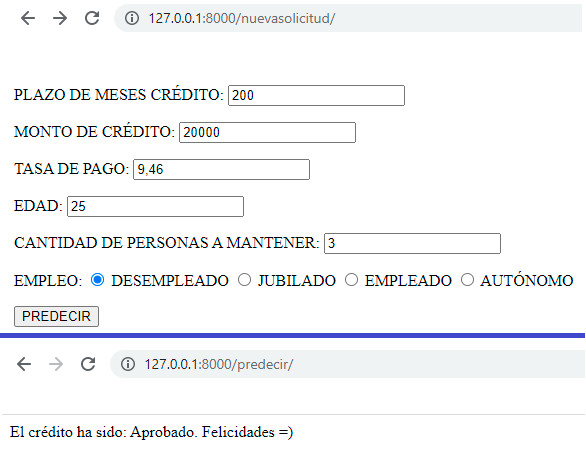

**Prueba en Postman de servicio web con form-data con un caso de aprobación de crédito**

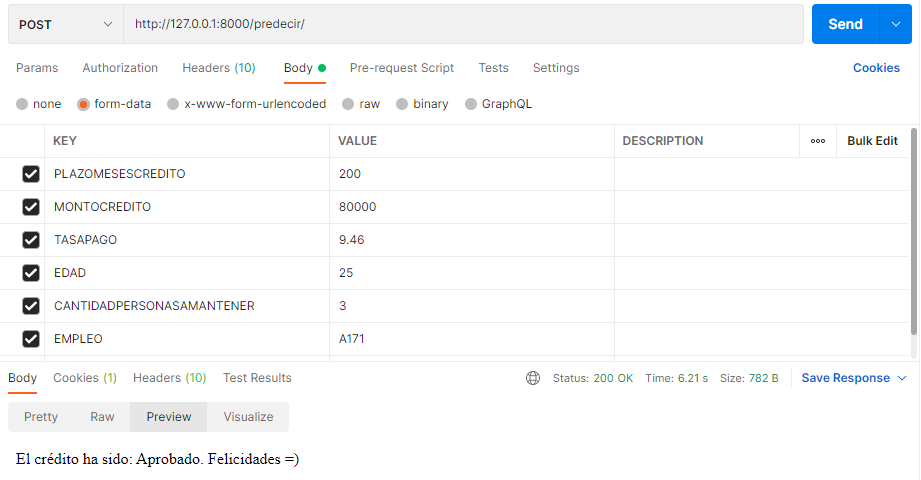

**Prueba en Postman de servicio web con form-data con un caso de negación de crédito**

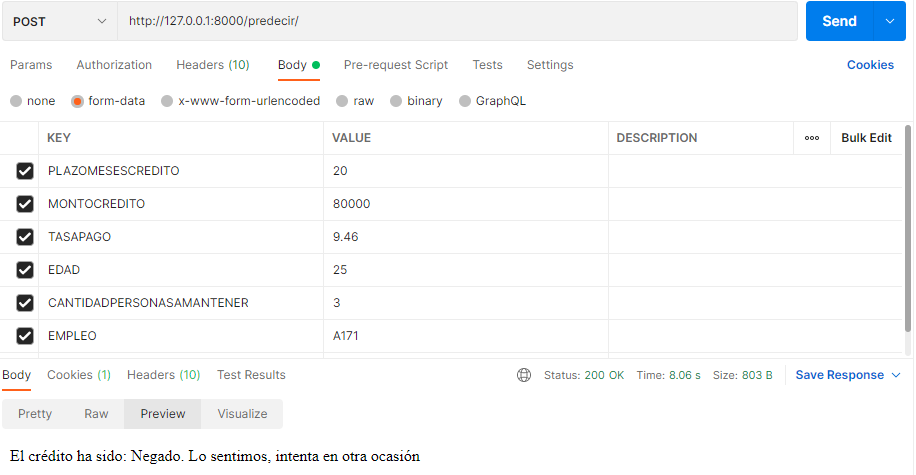

**Prueba en Postman de servicio con formato JSON con un caso de aprobación de crédito**

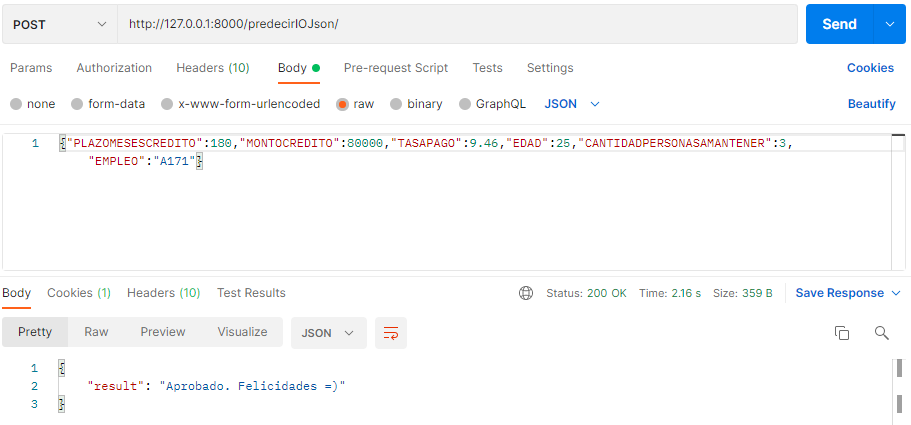

**Prueba en Postman de servicio con formato JSON con un caso de negación de crédito**

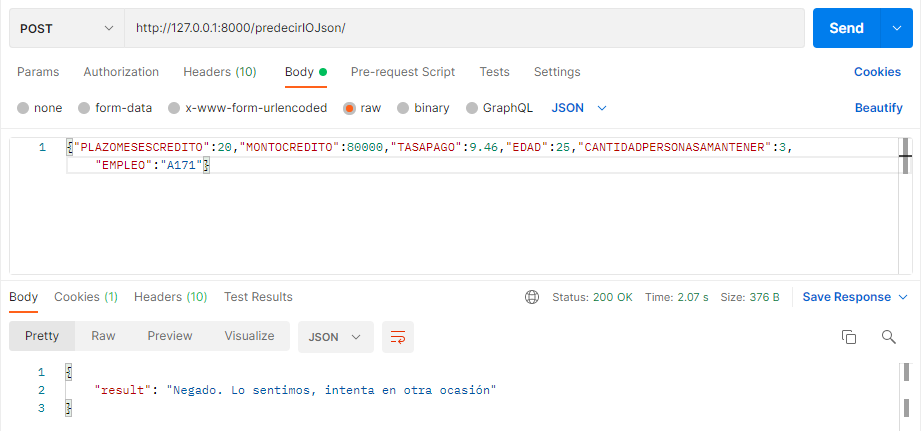

<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

Con esta práctica hemos aprendido a desplegar fácilmente en Flask y Django un servicio de machine learning que incluye un preprocesamiento y una red neuronal para clasificación de clientes en préstamos, con el fin de predecir si un cliente esta calificado para obtener o no un crédito.

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

[1] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

[2] S. Raschka, V. Mirjalili. (2007). Python Machine Learning, Packt Publishing Ltd.

**Enlaces de documentación de django y gunicorn:**

https://www.djangoproject.com/

https://docs.djangoproject.com/en/3.0/

https://docs.djangoproject.com/en/dev/topics/

https://www.python.org/?hl=es

https://docs.djangoproject.com/en/3.0/topics/files/

https://www.python.org/dev/peps/pep-3333/

https://gunicorn.org/